# Description

In this Notebook, we have Examined the data set that will be used for the training and testing of the different developed models. As can be seen from the figures provided below, the dataset is baised toward positive ratings. to Tackle this problem we tried two approaches. Approach 1: to train two different models, one for the ratings from (1-3) and the other for ratigs from (3-5). In this approach the review is inputed to the first model and if the output is 3 it is then inputed to the second model, otherwise the produced rating is the output. Approach 2: we used oversampling by SMOTETomek() over the whole dataset and then used different classification models to decide which is better. We have tried linear SVM, SVM with rbf, logestic regression, random forest and knn classifiers. The values for the recall and precision achieved is provided below.

# Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import csv
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pickle

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# Reading Dataset from CSV File

In [ ]:
# Reading the csv file
review = pd.read_csv('/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
review  = review [['reviews.numHelpful','reviews.rating','reviews.text','reviews.title']]


In [ ]:
review = review.dropna()

In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16115 entries, 8349 to 28331
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   reviews.numHelpful  16115 non-null  float64
 1   reviews.rating      16115 non-null  int64  
 2   reviews.text        16115 non-null  object 
 3   reviews.title       16115 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 629.5+ KB


In [ ]:
review = review.set_index([pd.Index([i for i in range(review.shape[0])])])

# Preprocessing

In [ ]:
# Text preprocessing
from nltk.tokenize import word_tokenize

words = pd.DataFrame(columns = ['words'])
stop_words = set(nltk.corpus.stopwords.words("english")) - set(["not"])
Lemmatizer = WordNetLemmatizer()

#change to review.index after complete, this helps with runtime
for num in review.index:
    word_tokens = word_tokenize(review['reviews.text'][num])
    word_tokens2 = word_tokenize(review['reviews.title'][num])
    word_tokens2 = [w.lower() for w in word_tokens2]
    word_tokens = [w.lower() for w in word_tokens]
    word_tokens = word_tokens + word_tokens2
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            if w.isalpha():
                filtered_sentence.append(Lemmatizer.lemmatize(w))
    words = words.append({'words': filtered_sentence}, ignore_index = True)
review['words'] = words
review

,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,words
0,1.0,5,Pros: I love the Alexa series so when this one...,Great addition to a living room,"[pro, love, alexa, series, one, went, sale, ge..."
1,0.0,4,"ASIDE FROM THE FACT THAT THE SCREEN IS SMALL, ...",ALEXA ENABLED DEVICE WITH SCREEN.,"[aside, fact, screen, small, great, little, de..."
2,0.0,5,"I wasn't sure I even wanted this item, but cau...",Gotta have this one!!,"[sure, even, wanted, item, caught, excitement,..."
3,1.0,5,Pros: Works good like Alexia Cons: setting it ...,Fire stick,"[pro, work, good, like, alexia, con, setting, ..."
4,1.0,5,Pros: Relatively easy to setup and works quite...,Great product,"[pro, relatively, easy, setup, work, quite, re..."
...,...,...,...,...,...
16110,0.0,5,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,"[got, yr, old, twin, yr, old, one, one, better..."
16111,0.0,4,I bought this for my niece for a Christmas gif...,yes it is a great tablet.,"[bought, niece, christmas, year, old, love, ye..."
16112,0.0,5,"Very nice for light internet browsing, keeping...",You get a lot for the price!,"[nice, light, internet, browsing, keeping, top..."
16113,0.0,5,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!,"[tablet, absolutely, everything, want, watch, ..."


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


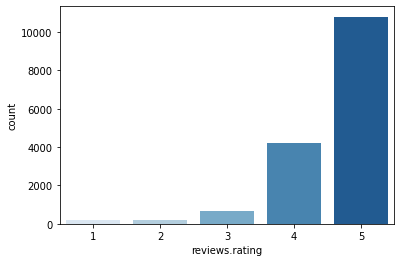

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(review['reviews.rating'],palette ='Blues')
plt.ylabel=('count')
plt.xlabel=('rating')
plt.show()

In [ ]:
# Seperating features
features = review.drop(columns = ['reviews.text','reviews.title','reviews.rating'])

In [ ]:
# train/test split

X_train,X_test,Y_train, Y_test = train_test_split(features, review['reviews.rating'], test_size = 0.25, random_state = 30)
X_train = X_train.reset_index().drop(columns = ['index'])
X_test = X_test.reset_index().drop(columns = ['index'])
Y_train = Y_train.reset_index().drop(columns = ['index'])
Y_test = Y_test.reset_index().drop(columns = ['index'])


Using Tfidf() Vectorizer for vectoriztion

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
count = 0
X_train_string = pd.DataFrame(columns = ['strings'])
for words in X_train['words']:
    X_train_string = X_train_string.append({'strings': ' '.join(words)}, ignore_index=True)

X_test_string = pd.DataFrame(columns = ['strings'])
for words in X_test['words']:
    X_test_string = X_test_string.append({'strings': ' '.join(words)}, ignore_index=True)

vectorizer = TfidfVectorizer(max_features = 500, ngram_range = (1, 2))
vectorizer.fit(X_train_string['strings'])
# save the vectorizer
pickle.dump(vectorizer, open('saved_vectorizer.sav', 'wb')) #adding the chosen model to be saved

tf_x_train = vectorizer.transform(X_train_string['strings'])
tf_x_test = vectorizer.transform(X_test_string['strings'])

print(tf_x_train[0])
print(tf_x_test[0])

  (0, 365)	0.3434946247901985
  (0, 364)	0.4688755737842757
  (0, 204)	0.7241618325486666
  (0, 193)	0.20793255908295596
  (0, 51)	0.21695989675169403
  (0, 28)	0.21782844948071206
  (0, 493)	0.17364776161041806
  (0, 492)	0.1577401991755483
  (0, 441)	0.17779792078748333
  (0, 425)	0.09020081860263794
  (0, 399)	0.19297623658281635
  (0, 392)	0.27484099351593366
  (0, 373)	0.2685449434431753
  (0, 342)	0.26954070746519215
  (0, 314)	0.15435346278807016
  (0, 306)	0.15118183700822788
  (0, 292)	0.27446959769627505
  (0, 290)	0.19595936211016365
  (0, 266)	0.293625695098827
  (0, 261)	0.210608630645096
  (0, 247)	0.21959115895944603
  (0, 193)	0.08098559397544847
  (0, 185)	0.18948162965134485
  (0, 157)	0.21377616997022655
  (0, 77)	0.19823925854556765
  (0, 61)	0.27712929471426057
  (0, 60)	0.18105384713188336
  (0, 46)	0.2672474027603118


# Approach 1:

In [ ]:
Y_train_4  = Y_train[Y_train['reviews.rating'] < 4 ]
index = Y_train[Y_train['reviews.rating'] < 4 ].index.values
tx_train_4 = tf_x_train[index,: ]


Y_train_5  = Y_train[Y_train['reviews.rating']  > 2 ]
index = Y_train[Y_train['reviews.rating'] > 2 ].index.values
tx_train_5 = tf_x_train[index,: ]

In [ ]:
from imblearn.combine import SMOTEENN , SMOTETomek
sm = SMOTETomek ()
tx_train_5_resampled, Y_train_5_resampled = sm.fit_resample(tx_train_5 , Y_train_5)

In [ ]:
from imblearn.combine import SMOTEENN , SMOTETomek
sm = SMOTETomek ()
tx_train_4_resampled, Y_train_4_resampled = sm.fit_resample(tx_train_4 , Y_train_4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


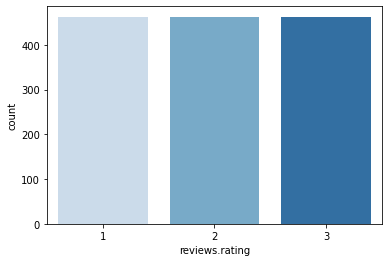

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(Y_train_4_resampled['reviews.rating'],palette ='Blues')
plt.ylabel=('count')
plt.xlabel=('rating')
plt.show()

## First Model:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
model4 = LogisticRegression()
model4.fit(tx_train_4,Y_train_4)
pickle.dump(model4, open('saved_model_trial.sav', 'wb')) #adding the chosen model to be saved

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_test_pred = model4.predict(tf_x_test)
report = classification_report(Y_test, y_test_pred)
print(report)
tf_x_test_sub = tf_x_test[y_test_pred > 2]

              precision    recall  f1-score   support

           1       0.29      0.42      0.35        45
           2       0.39      0.46      0.42        52
           3       0.05      0.94      0.09       196
           4       0.00      0.00      0.00      1032
           5       0.00      0.00      0.00      2704

    accuracy                           0.06      4029
   macro avg       0.15      0.36      0.17      4029
weighted avg       0.01      0.06      0.01      4029



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Second Model:

In [ ]:
# second model
model5 = svm.SVC(C = 100 , gamma = 50 , kernel = 'rbf', random_state=8)
model5.fit(tx_train_5,Y_train_5)
y_test_pred_sub = model5.predict(tf_x_test_sub)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_test_pred[y_test_pred > 2] = y_test_pred_sub
from sklearn.metrics import classification_report
report = classification_report(Y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      0.62      0.77        45
           2       1.00      0.62      0.76        52
           3       1.00      0.59      0.74       196
           4       1.00      0.63      0.78      1032
           5       0.84      1.00      0.92      2704

    accuracy                           0.88      4029
   macro avg       0.97      0.69      0.79      4029
weighted avg       0.90      0.88      0.87      4029



# Approach 2:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


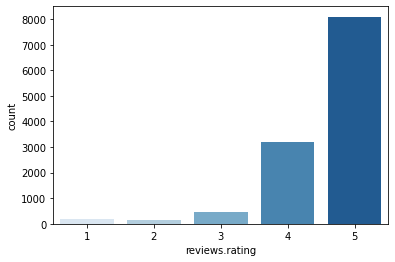

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(Y_train['reviews.rating'],palette ='Blues')
plt.ylabel=('count')
plt.xlabel=('rating')
plt.show()

In [ ]:
from imblearn.combine import SMOTEENN , SMOTETomek
sm = SMOTETomek ()
x_resampled, y_resampled = sm.fit_resample(tf_x_train , Y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


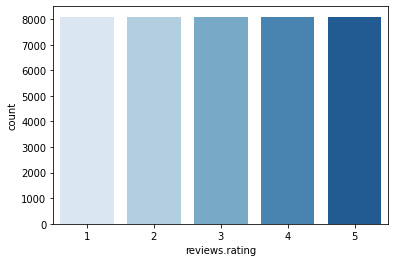

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y_resampled['reviews.rating'],palette ='Blues')
plt.ylabel=('count')
plt.xlabel=('rating')
plt.show()

## Model 1:

In [ ]:
from sklearn import svm
model = svm.SVC(C = 100 ,kernel = 'linear', random_state=8)

In [ ]:
model.fit(x_resampled,y_resampled)
pickle.dump(model, open('saved_model_linear_svc.sav', 'wb')) #adding the chosen model to be saved
y_test_pred = model.predict(tf_x_test)
from sklearn.metrics import classification_report

# Trying the model on the Test set to check its performance
report=classification_report(Y_test, y_test_pred)
print(report)

## Model 2:

In [ ]:
from sklearn import svm
modelsvc = svm.SVC(C = 100 , gamma = 50 , kernel = 'rbf', random_state=8)

In [ ]:
modelsvc.fit(tf_x_train,Y_train)
# Save the model
pickle.dump(modelsvc, open('saved_model_svc.sav', 'wb')) #adding the chosen model to be saved

y_test_pred = modelsvc.predict(tf_x_test)
from sklearn.metrics import classification_report

# Trying the model on the Test set to check its performance
report=classification_report(Y_test, y_test_pred)
print(report)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           1       1.00      0.62      0.77        45
           2       0.94      0.62      0.74        52
           3       1.00      0.59      0.74       196
           4       1.00      0.63      0.78      1032
           5       0.85      1.00      0.92      2704

    accuracy                           0.88      4029
   macro avg       0.96      0.69      0.79      4029
weighted avg       0.90      0.88      0.87      4029



## Model 3:

In [ ]:
from sklearn import svm
model = svm.SVC(C = 1000 , gamma = 80 , kernel = 'rbf', random_state=8)

In [ ]:
model.fit(x_resampled,y_resampled)
y_test_pred = model.predict(tf_x_test)
from sklearn.metrics import classification_report

# Trying the model on the Test set to check its performance
report=classification_report(Y_test, y_test_pred)
print(report)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           1       1.00      0.62      0.77        45
           2       1.00      0.62      0.76        52
           3       1.00      0.59      0.74       196
           4       1.00      0.63      0.78      1032
           5       0.84      1.00      0.92      2704

    accuracy                           0.88      4029
   macro avg       0.97      0.69      0.79      4029
weighted avg       0.90      0.88      0.87      4029



## Model 4:

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_resampled,y_resampled)
y_test_pred = model.predict(tf_x_test)
pickle.dump(model, open('saved_model_log.sav', 'wb')) #adding the chosen model to be saved
from sklearn.metrics import classification_report

# Trying the model on the Test set to check its performance
report=classification_report(Y_test, y_test_pred)
print(report)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           1       0.33      0.73      0.46        45
           2       0.19      0.58      0.28        52
           3       0.28      0.60      0.38       196
           4       0.43      0.51      0.47      1032
           5       0.83      0.66      0.74      2704

    accuracy                           0.62      4029
   macro avg       0.41      0.62      0.47      4029
weighted avg       0.69      0.62      0.64      4029



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Model 5:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 300)
model.fit(x_resampled,y_resampled)
y_test_pred = model.predict(tf_x_test)
from sklearn.metrics import classification_report

# Trying the model on the Test set to check its performance
report=classification_report(Y_test, y_test_pred)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           1       1.00      0.62      0.77        45
           2       0.70      0.67      0.69        52
           3       0.91      0.66      0.77       196
           4       0.81      0.76      0.79      1032
           5       0.90      0.94      0.92      2704

    accuracy                           0.88      4029
   macro avg       0.86      0.73      0.79      4029
weighted avg       0.88      0.88      0.87      4029



## Model 6:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 150)
model.fit(x_resampled,y_resampled)
y_test_pred = model.predict(tf_x_test)
from sklearn.metrics import classification_report

# Trying the model on the Test set to check its performance
report=classification_report(Y_test, y_test_pred)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           1       0.97      0.64      0.77        45
           2       0.71      0.67      0.69        52
           3       0.91      0.66      0.77       196
           4       0.80      0.76      0.78      1032
           5       0.90      0.94      0.92      2704

    accuracy                           0.87      4029
   macro avg       0.86      0.73      0.79      4029
weighted avg       0.87      0.87      0.87      4029



## Model 7:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_resampled,y_resampled)
pickle.dump(model, open('saved_model_knn.sav', 'wb')) #adding the chosen model to be saved
y_test_pred = model.predict(tf_x_test)
from sklearn.metrics import classification_report

# Trying the model on the Test set to check its performance
report=classification_report(Y_test, y_test_pred)
print(report)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           1       0.49      0.67      0.57        45
           2       0.03      0.94      0.06        52
           3       0.40      0.68      0.51       196
           4       0.49      0.61      0.54      1032
           5       0.93      0.25      0.39      2704

    accuracy                           0.38      4029
   macro avg       0.47      0.63      0.41      4029
weighted avg       0.78      0.38      0.43      4029



# Refrences:
- Dataset:
https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products
